In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
# Carregar a base de dados Breast Cancer Wisconsin
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [4]:
# Explorar os dados
print("Número de classes:", np.unique(y).size)
print("Número de atributos:", X.shape[1])
print("Número de exemplos:", X.shape[0])
display(pd.DataFrame(X, columns=cancer_data.feature_names).head())

Número de classes: 2
Número de atributos: 30
Número de exemplos: 569


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Função para plotar as regiões de decisão
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.01),
                         np.arange(y_min , y_max , 0.01))

    # Fazer previsões para cada ponto no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar as regiões de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title('Regiões de Decisão da Árvore de Decisão')
    plt.xlabel('Atributo 1')
    plt.ylabel('Atributo 2')
    plt.show()

In [8]:
# Treinar uma Árvore de Decisão e variar a profundidade máxima
max_depths = [1, 2, 3, 4, 5]
results = []

In [9]:
for max_depth in max_depths:
    # Criar o modelo da árvore de decisão
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Usando apenas os dois primeiros atributos para treinar e prever
    model.fit(X_train[:, :2], y_train)  
    
    # Fazer previsões no conjunto de teste
    predictions = model.predict(X_test[:, :2])
    
    # Avaliar o desempenho
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Armazenar os resultados
    results.append({
        'max_depth': max_depth,
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'model': model  # Armazenar o modelo para visualização posterior
    })

Profundidade Máxima: 1
Acurácia: 0.9298
F1-Score: 0.9459
Matriz de Confusão:
[[36  7]
 [ 1 70]]



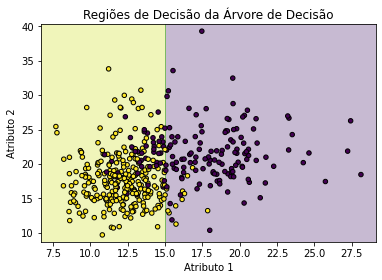

Profundidade Máxima: 2
Acurácia: 0.9123
F1-Score: 0.9333
Matriz de Confusão:
[[34  9]
 [ 1 70]]



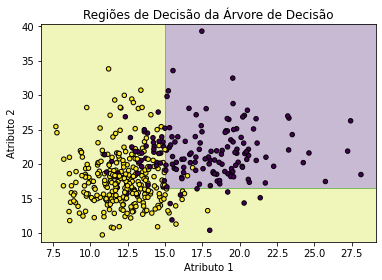

Profundidade Máxima: 3
Acurácia: 0.9123
F1-Score: 0.9286
Matriz de Confusão:
[[39  4]
 [ 6 65]]



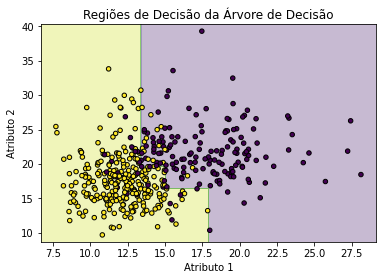

Profundidade Máxima: 4
Acurácia: 0.9298
F1-Score: 0.9437
Matriz de Confusão:
[[39  4]
 [ 4 67]]



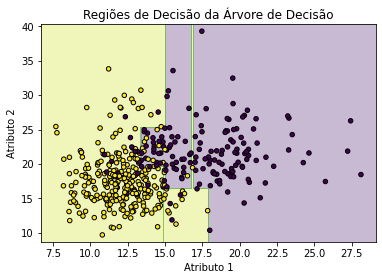

Profundidade Máxima: 5
Acurácia: 0.8684
F1-Score: 0.8872
Matriz de Confusão:
[[40  3]
 [12 59]]



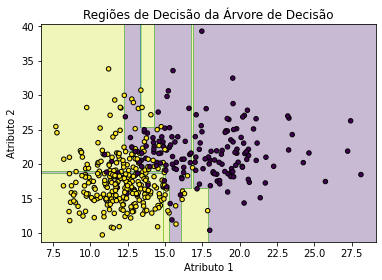

In [10]:
# Exibir os resultados e plotar as regiões de decisão para cada profundidade máxima
for result in results:
    print(f"Profundidade Máxima: {result['max_depth']}")
    print(f"Acurácia: {result['accuracy']:.4f}")
    print(f"F1-Score: {result['f1_score']:.4f}")
    print(f"Matriz de Confusão:\n{result['confusion_matrix']}\n")
    
    # Plotar as regiões de decisão usando apenas os dois primeiros atributos
    plot_decision_regions(X_train[:, :2], y_train, result['model'])